In [27]:
import numpy as np
from matplotlib import pyplot as plt

# Conditions of Cauchy type integral

1. The boundary $\Gamma$ should have no corners or cusps, as I have calculated in my draft yesterday that at corners the priciple value will hardly converge. 
2. Currently I have the initial conditions are 
   1. presoille flow on inlet and outlet. 
   2. non-splippery on other parts of the boundary. 
   3. ❓ Does this give me a legal boundary conditions? 

Therefore,  I need to smooth the boundary $\Gamma$. 

The simplest type of geometry to consider is the following


In [56]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [92]:
def line_from_origin(x,y,n=32):
    '''
    return a numpy array of n points from (0,0) to (x,y)
    '''
    X = np.linspace(0,x,n)
    Y = np.linspace(0,y,n)
    return np.array([X,Y])

def line(x0,y0,x1,y1,n=32):
    '''
    return a numpy array of n points from (x0,y0) to (x1,y1)
    '''
    X = np.linspace(x0,x1,n)
    Y = np.linspace(y0,y1,n)
    return np.array([X,Y])

def arc(x,y,r,theta1,theta2,n=32):
    '''
    for a circe centered at (x,y) and radius r, this function returns n points on the 
    arc from angle theta1 to theta2. 
    '''
    
    theta = np.linspace(theta1,theta2,n)
    X = np.cos(theta)*r + x
    Y = np.sin(theta)*r + y
    return np.array([X,Y])

def arc_fit(x0,y0,k0,
            x1,y1,k1,
            n=32):
    '''
    given a point (x0,y0) with a slope k1, a point (x1,y1) with a slope k2,
    this returns n points on the arc that fit the two pts and their slopes. 
    Notice that this does not work for arbitrary input, there is certain 
    symmetries required. and this condition will be tested in this code
    '''
    
    d = np.linalg.norm(np.array([x0,y0]) - np.array([x1,y1]))/2
    
    theta0 = np.arctan(k0)
    theta1 = np.arctan(k1)
    theta2 = (np.pi - abs(theta0) - abs(theta1))/2
    
    r = abs(d/np.cos(theta2))
    nx = np.cos(theta0-np.pi/2)
    ny = np.sin(theta0-np.pi/2)
    
    x = x0 + nx*r
    y = y0 + ny*r
    
    # return arc(x,y,r,0,6.29,n)    
    return arc(x,y,r,np.pi/2 - theta0,np.pi/2 - theta1,n)    
    

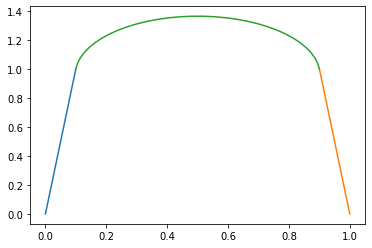

In [93]:
line1 = line(0,0,0.1,1) 
line2 = line(1,0,0.9,1)
plt.plot(*line1)
plt.plot(*line2)
a = arc_fit(0.1,1,10,0.9,1,-10,32)
plt.plot(*a)

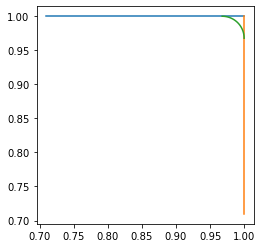

In [108]:
fig, ax = plt.subplots()
line1 = line(0,1,1,1) 
line2 = line(1,1,1,0)
ax.plot(*(line1[:,-10:]))
ax.plot(*(line2[:,:10]))
a = arc_fit(*(line1[:,-2]),0,*(line2[:,1]),np.inf)
ax.plot(*a)
ax.set_aspect(1)


I partly figured out how to make a smooth geometry from a polygon as in the above example. However, I should probably should firstly solve the 2d stokes for the smooth geometry before trying the case with cornered geometry. 

In [2]:
class contour:
    def __init__(self,):
        pass
    
class boundary:
    def __init__(self,):
        pass